In [ ]:
import veneer
from veneer.manage import BulkVeneer
%matplotlib inline
import geopandas as gpd
import pandas as pd

In [3]:
from veneer.batch import BatchRunner

## Connect to Source and test connection

Using 4 instances

In [4]:
## Veneer started elsewhere (probably from a command line using veneer.manager.start)
ports = list(range(15004,15008))
ports

[15004, 15005, 15006, 15007]

In [5]:
bv = BulkVeneer(ports)

In [8]:
v = bv.veneers[1]

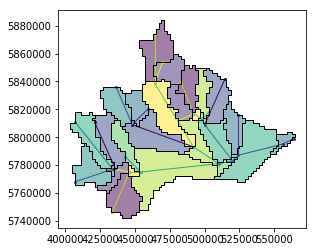

In [9]:
network = v.network()
network.as_dataframe().plot()

In [10]:
network.outlet_nodes()

[{'geometry': {'coordinates': [564000, 5799000], 'type': 'Point'}, 'id': '/network/nodes/4', 'properties': {'name': 'Generated node name #1', 'feature_type': 'node', 'icon': '/resources/ConfluenceNodeModel'}, 'type': 'Feature'}]

In [11]:
outlet_node = network.outlet_nodes()[0]['properties']['name'] + '$'

## Enumerate the parameter combinations

In [12]:
import numpy as np

In [13]:
N_RUNS=100

In [14]:
params = {
    'x1':np.random.uniform(1.0,1500.0,size=N_RUNS),
    'x2':np.random.uniform(1.0,5.0,size=N_RUNS),
    'x3':np.random.uniform(1.0,200.0,size=N_RUNS),
    'x4':np.random.uniform(0.5,3.0,size=N_RUNS)
}
params = pd.DataFrame(params)
params

,x1,x2,x3,x4
0,1437.038293,4.589127,156.416815,1.917925
1,490.635325,1.373342,66.261211,2.132400
2,503.157913,3.837195,139.371838,1.133919
3,762.522418,4.915908,23.330254,1.689078
4,1476.447618,1.865532,25.549203,2.020109
5,594.121244,3.441850,20.646041,0.730907
6,280.045280,2.909545,58.588357,0.605880
7,529.685542,3.981529,193.636181,1.359530
8,584.717939,1.327539,184.592716,2.273602
9,1023.641410,3.958867,133.133076,2.675517


## Specify the model changes

(Much like we do when setting up a PEST job)

In [15]:
runner = BatchRunner(bv.veneers)

In [16]:
v.model.catchment.runoff.set_param_values?

In [17]:
for p in ['x1','x2','x3','x4']:
    runner.parameters.model.catchment.runoff.set_param_values(p,'$%s$'%p,fus=['Grazing'])

## Specify the result 'y' that we want to retrieve

In [18]:
runner.retrieve('y').retrieve_multiple_time_series(criteria={'NetworkElement':outlet_node,'RecordingVariable':'Downstream Flow Volume'}).sum()[0]

In [19]:
%xmode Verbose
print(runner._retrieval.script())

Exception reporting mode: Verbose
results['y'] = v.retrieve_multiple_time_series(criteria={'NetworkElement': 'Generated node name #1$', 'RecordingVariable': 'Downstream Flow Volume'}).sum()[0]


## Trigger the run...

Will run the 100 simulations across the four instances of Source (25 runs each)

In [20]:
jobs,results = runner.run(params)

0 x1    1437.038293
x2       4.589127
x3     156.416815
x4       1.917925
Name: 0, dtype: float64
1 x1    490.635325
x2      1.373342
x3     66.261211
x4      2.132400
Name: 1, dtype: float64
2 x1    503.157913
x2      3.837195
x3    139.371838
x4      1.133919
Name: 2, dtype: float64
3 x1    762.522418
x2      4.915908
x3     23.330254
x4      1.689078
Name: 3, dtype: float64
4 x1    1476.447618
x2       1.865532
x3      25.549203
x4       2.020109
Name: 4, dtype: float64
5 x1    594.121244
x2      3.441850
x3     20.646041
x4      0.730907
Name: 5, dtype: float64
6 x1    280.045280
x2      2.909545
x3     58.588357
x4      0.605880
Name: 6, dtype: float64
7 x1    529.685542
x2      3.981529
x3    193.636181
x4      1.359530
Name: 7, dtype: float64
8 x1    584.717939
x2      1.327539
x3    184.592716
x4      2.273602
Name: 8, dtype: float64
9 x1    1023.641410
x2       3.958867
x3     133.133076
x4       2.675517
Name: 9, dtype: float64
10 x1    370.904067
x2      3.148611
x3    143.9

In [ ]:
#jobs

## The results

In [21]:
pd.DataFrame(results)

,y
0,2.972840e+09
1,2.972840e+09
2,2.972840e+09
3,-1.460854e+07
4,2.972840e+09
5,2.972840e+09
6,2.972840e+09
7,-1.460854e+07
8,2.972840e+09
9,2.972840e+09
